<a href="https://colab.research.google.com/github/brokentwigs/Colab-Analysis/blob/main/DataAnalyticsHardDriveVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import glob
# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns # also improves the look of plots (density plots and histograms)
sns.set()
plt.rcParams['figure.figsize'] = 15, 5 # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1 # to fix issue with seaborn box plots; needed after import seaborn

from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.cluster import KMeans # for clustering
from sklearn.tree import DecisionTreeClassifier # for decision tree mining
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from treeviz import tree_print # to print decision tree
from tslearn.metrics import dtw
from tslearn.metrics import soft_dtw
from tslearn.clustering import TimeSeriesKMeans

C:\Users\praya\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [ ]:
df_healthy_001_food = pd.read_csv('healthy_subset/001/food.csv',parse_dates=[['date', 'time']]).drop(['picture'], axis = 1)
df_healthy_002_food = pd.read_csv('healthy_subset/002/food.csv',parse_dates=[['date', 'time']]).drop(['picture'], axis = 1).dropna()
df_healthy_003_food = pd.read_csv('healthy_subset/003/food.csv',parse_dates=[['date', 'time']]).drop(['picture'], axis = 1).dropna()
df_healthy_004_food = pd.read_csv('healthy_subset/004/food.csv',parse_dates=[['date', 'time']]).drop(['picture'], axis = 1).dropna()

df_healthy_001_ecg = pd.read_csv('healthy_subset/001/sensor_data/2014_10_01-12_50_01/2014_10_01-12_50_01_ECG.csv')

df_healthy_001_food

,date_time,description,calories,balance,quality
0,2014-10-01 12:58:00,"Tortelliniswith cheese,salad and Kagi chocolate",770.0,Unbalance,Medium quality
1,2014-10-01 15:30:00,Yogourt + chocolate bar,NaN,NaN,NaN
2,2014-10-01 18:11:00,"Champignon pizza, beet steamed, pear and grapes",926.0,Unbalance,Good quality
3,2014-10-01 22:00:00,Yogourt,NaN,NaN,NaN
4,2014-10-02 07:33:00,"Toast with mermelade,croissant with chocolate,...",689.0,Balance,Medium quality
5,2014-10-02 09:28:00,Coffee + chocolate bar,NaN,NaN,NaN
6,2014-10-02 12:06:00,"Pasta with meat loaf, endives, kiwi and plum",612.0,Unbalance,Good quality
7,2014-10-02 18:00:00,Beer tasting,NaN,NaN,NaN
8,2014-10-02 20:03:00,"Fondue,meat,Raw beef onions and cucumber, bread",1697.0,Unbalance,Good quality
9,2014-10-03 08:10:00,"Nutella pie, orange juice, coffee and mandarine",874.0,Unbalance,Medium quality


In [ ]:
df_ecg_001_day_1 = pd.read_csv('healthy_subset/002/sensor_data/2014_10_01-06_17_49/2014_10_01-06_17_49_ECG.csv')

df_ecg_001_day_1['Time'] = df_ecg_001_day_1['Time'].str.slice(0, -4)
df_ecg_001_day_1['Time'] = (pd.to_datetime(df_ecg_001_day_1['Time'])).dt.strftime('%Y-%d-%m %H:%M:%S')

In [ ]:
df_ecg_002_day_1 = pd.read_csv('healthy_subset/003/sensor_data/2014_10_01-10_14_30/2014_10_01-10_14_30_ECG.csv')

df_ecg_002_day_1['Time'] = df_ecg_002_day_1['Time'].str.slice(0, -4)
df_ecg_002_day_1['Time'] = (pd.to_datetime(df_ecg_002_day_1['Time'])).dt.strftime('%Y-%d-%m %H:%M:%S')

In [ ]:
df_ecg_001_day_1

,Time,EcgWaveform
0,2014-10-01 12:50:01,297
1,2014-10-01 12:50:01,297
2,2014-10-01 12:50:01,297
3,2014-10-01 12:50:01,297
4,2014-10-01 12:50:01,297
...,...,...
7849995,2014-10-01 21:33:21,2015
7849996,2014-10-01 21:33:21,2014
7849997,2014-10-01 21:33:21,2014
7849998,2014-10-01 21:33:21,2014


In [ ]:
df_ecg_001_day_1['Time'] = pd.to_datetime(df_ecg_001_day_1['Time'])

df_ecg_002_day_1['Time'] = pd.to_datetime(df_ecg_002_day_1['Time'])



In [ ]:
meal_times_001_day_1 = np.intersect1d(df_ecg_001_day_1['Time'],df_healthy_001_food['date_time'])
meal_times_002_day_1 = np.intersect1d(df_ecg_002_day_1['Time'],df_healthy_002_food['date_time'])

In [ ]:
before_lunch = meal_times_001_day_1[0] - np.timedelta64(3,'m')
after_lunch = meal_times_001_day_1[0] + np.timedelta64(3,'m')
lunch = df_ecg_001_day_1[(df_ecg_001_day_1['Time']>before_lunch) & (df_ecg_001_day_1['Time']<after_lunch)]


before_lunch_2 = meal_times_002_day_1[0] - np.timedelta64(3,'m')
after_lunch_2 = meal_times_002_day_1[0] + np.timedelta64(3,'m')
lunch_2 = df_ecg_002_day_1[(df_ecg_002_day_1['Time']>before_lunch) & (df_ecg_002_day_1['Time']<after_lunch)]



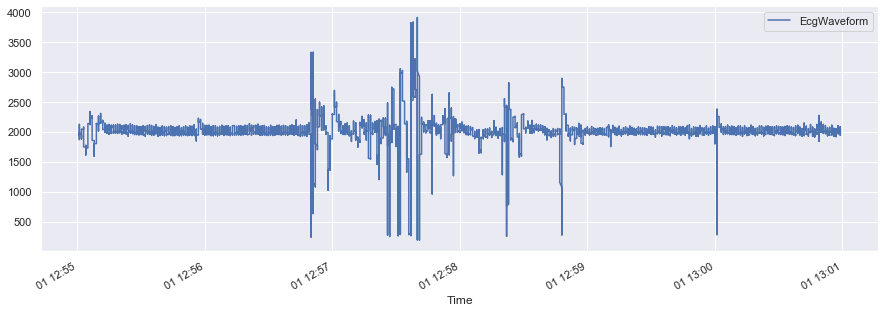

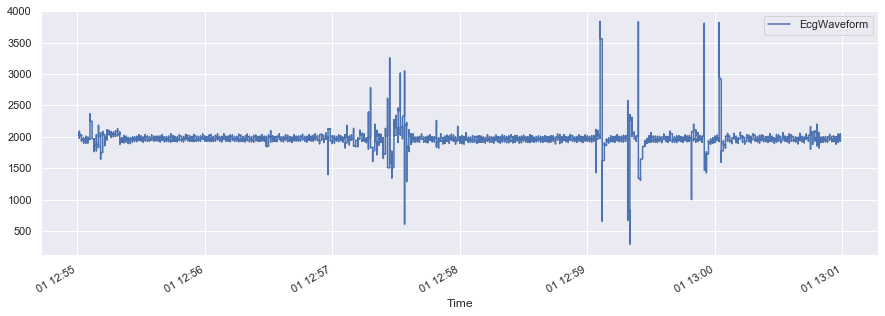

In [ ]:
lunch.plot(x = 'Time',y='EcgWaveform')
lunch_2.plot(x = 'Time',y='EcgWaveform')

In [ ]:
dtw_score = dtw(lunch['Time'],lunch['EcgWaveform'])

MemoryError: Unable to allocate 60.0 GiB for an array with shape (89750, 89750) and data type float64

In [ ]:
path = r'healthy_subset/001/AllECGS' # use your path

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
#frame.plot(x='Time',y='EcgWaveform')
#df_healthy_001_food['calories'] = pd.to_numeric(df_healthy_001_food['calories'])
#df_healthy_001_food.plot(x='date_time',y='calories')



,Time,EcgWaveform
0,01/10/2014 12:50:01.447,297
1,01/10/2014 12:50:01.451,297
2,01/10/2014 12:50:01.455,297
3,01/10/2014 12:50:01.459,297
4,01/10/2014 12:50:01.463,297
...,...,...
47611495,04/10/2014 21:10:41.428,2150
47611496,04/10/2014 21:10:41.432,2151
47611497,04/10/2014 21:10:41.436,2152
47611498,04/10/2014 21:10:41.440,2153


In [ ]:

df_healthy_001_food['date_time']
frame['Time'] = frame['Time'].str.slice(0, -4)
frame['Time'] = (pd.to_datetime(frame['Time'])).dt.strftime('%Y-%d-%m %H:%M:%S')
frame['Time']

0           2014-10-01 12:50:01
1           2014-10-01 12:50:01
2           2014-10-01 12:50:01
3           2014-10-01 12:50:01
4           2014-10-01 12:50:01
                   ...         
47611495    2014-10-04 21:10:41
47611496    2014-10-04 21:10:41
47611497    2014-10-04 21:10:41
47611498    2014-10-04 21:10:41
47611499    2014-10-04 21:10:41
Name: Time, Length: 47611500, dtype: object

In [ ]:
frame['Time'] = pd.to_datetime(frame['Time'])

In [ ]:
df_healthy_001_food['date_time']

0    2014-10-01 12:58:00
1    2014-10-01 15:30:00
2    2014-10-01 18:11:00
3    2014-10-01 22:00:00
4    2014-10-02 07:33:00
5    2014-10-02 09:28:00
6    2014-10-02 12:06:00
7    2014-10-02 18:00:00
8    2014-10-02 20:03:00
9    2014-10-03 08:10:00
10   2014-10-03 10:10:00
11   2014-10-03 12:03:00
12   2014-10-03 16:00:00
13   2014-10-03 18:20:00
14   2014-10-04 07:57:00
15   2014-10-04 07:59:00
16   2014-10-04 12:03:00
17   2014-10-04 12:08:00
18   2014-10-04 12:08:00
Name: date_time, dtype: datetime64[ns]

In [ ]:
meal_times_001 = np.intersect1d(frame['Time'],df_healthy_001_food['date_time'])


In [ ]:
frame['meal'] = 0
meal_times_001 = pd.to_datetime(meal_times_001)



In [ ]:
frame.loc[(frame.Time.isin(meal_times_001)),'meal'] = 1

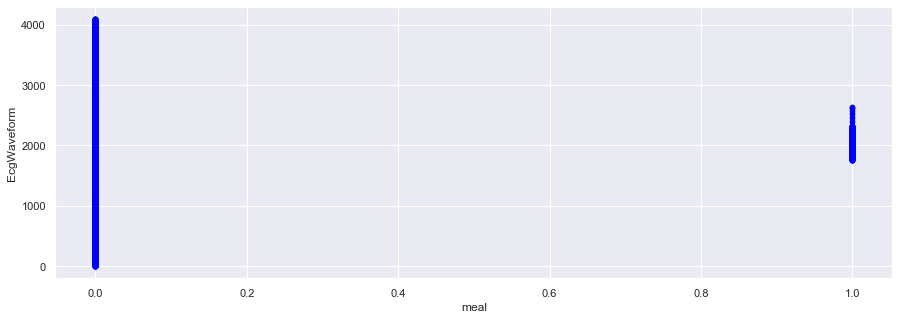

In [ ]:
frame.plot(kind='scatter',x='meal',y='EcgWaveform',c='blue')

In [ ]:
#mark the graph for it's significance

#significance: ECGs never occur beyond a certain range when meal is reported; allows the program to near-conclusively state when
#              a meal has not occured.

In [ ]:
path = r'healthy_subset/001/AllBreathing' # use your path

all_files = glob.glob(path + "/*.csv")

lis = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0)

    lis.append(df)

frameB = pd.concat(lis, axis=0, ignore_index=True)

In [ ]:
frameB['Time'] = frameB['Time'].str.slice(0, -4)
frameB['Time'] = (pd.to_datetime(frameB['Time'])).dt.strftime('%Y-%d-%m %H:%M:%S')
frameB['Time'] = pd.to_datetime(frameB['Time'])

In [ ]:
meal_times_001B = np.intersect1d(frameB['Time'],df_healthy_001_food['date_time'])


In [ ]:
meal_times_001B = pd.to_datetime(meal_times_001B)
meal_times_001B

DatetimeIndex(['2014-10-01 12:58:00', '2014-10-01 15:30:00',
               '2014-10-01 18:11:00', '2014-10-02 07:33:00',
               '2014-10-02 09:28:00', '2014-10-02 12:06:00',
               '2014-10-02 18:00:00', '2014-10-02 20:03:00',
               '2014-10-03 08:10:00', '2014-10-03 10:10:00',
               '2014-10-03 12:03:00', '2014-10-03 16:00:00',
               '2014-10-03 18:20:00', '2014-10-04 07:57:00',
               '2014-10-04 07:59:00', '2014-10-04 12:03:00',
               '2014-10-04 12:08:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
frameB['meal'] = 0
frameB

,Time,BreathingWaveform,meal
0,2014-10-01 12:50:01,6849416,0
1,2014-10-01 12:50:01,6848625,0
2,2014-10-01 12:50:01,6844828,0
3,2014-10-01 12:50:01,6844828,0
4,2014-10-01 12:50:01,6844828,0
...,...,...,...
4761145,2014-10-04 21:10:41,7743283,0
4761146,2014-10-04 21:10:41,7743178,0
4761147,2014-10-04 21:10:41,7744707,0
4761148,2014-10-04 21:10:41,7746500,0


In [ ]:
frameB.loc[(frame.Time.isin(meal_times_001B)),'meal'] = 1

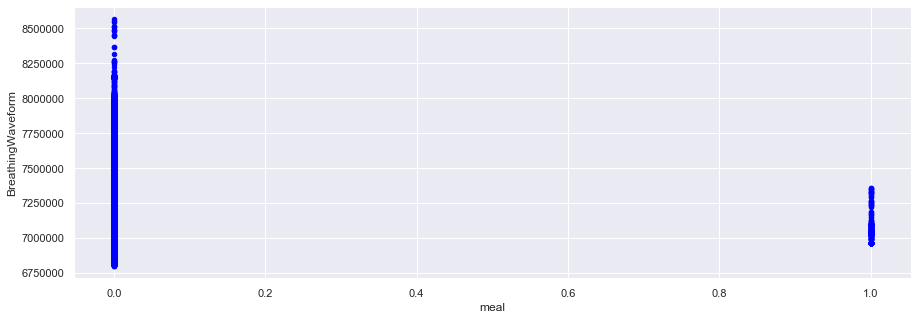

In [ ]:
frameB.plot(kind='scatter',x='meal',y='BreathingWaveform',c='blue')

In [ ]:
frameB

,Time,BreathingWaveform,meal
0,2014-10-01 12:50:01,6849416,0
1,2014-10-01 12:50:01,6848625,0
2,2014-10-01 12:50:01,6844828,0
3,2014-10-01 12:50:01,6844828,0
4,2014-10-01 12:50:01,6844828,0
...,...,...,...
4761145,2014-10-04 21:10:41,7743283,0
4761146,2014-10-04 21:10:41,7743178,0
4761147,2014-10-04 21:10:41,7744707,0
4761148,2014-10-04 21:10:41,7746500,0


In [ ]:
km = KMeans(n_clusters=2)
km.fit(frame[['EcgWaveform','meal']].copy())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_table = frame[['EcgWaveform','meal']].copy()
centers = pd.DataFrame(km.cluster_centers_, columns=cluster_table.columns)
cluster_table['cluster'] = km.labels_

In [ ]:
cluster_table[cluster_table['meal']==cluster_table['cluster']]
#accuracy level of cluster-to-meal:99.223%;However, the innacuracies could disproportionaly occur around when meal evaluates
#                                  to true

,EcgWaveform,meal,cluster
0,297,0,0
1,297,0,0
2,297,0,0
3,297,0,0
4,297,0,0
...,...,...,...
47611495,2150,0,0
47611496,2151,0,0
47611497,2152,0,0
47611498,2153,0,0


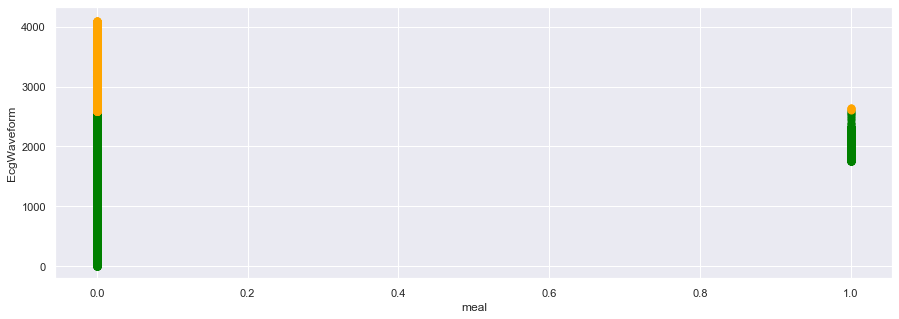

In [ ]:
ax = cluster_table[cluster_table['cluster']==0].plot(kind='scatter', x='meal', y='EcgWaveform', s=50, c='green')
cluster_table[cluster_table['cluster']==1].plot(kind='scatter',x='meal',y='EcgWaveform',s=50, c='orange', ax = ax)


centers.plot(kind = 'scatter', x='meal', y='EcgWaveform', c=['green','orange'], s=50, marker='x', ax=ax);

In [ ]:
#In interval of time(2.5 minutes before and after), the meal time should not exist as 0 and 1 discrete values but instead
#continous between the interval [0,1] ie 0.5,0.7,etc.
#Issues with amplitude:

In [ ]:
dtw_score = dtw(frame['Time'],frame['EcgWaveform'])

MemoryError: Unable to allocate 16.1 PiB for an array with shape (47611500, 47611500) and data type float64